# Selenium Introduction

Selenium is a powerful tool for automating web browsers. It provides a convenient way to interact with web pages, perform actions, and extract data.

## Key Features of Selenium

- Cross-browser compatibility: Selenium supports multiple web browsers such as Chrome, Firefox, Safari, and Internet Explorer.
- Web element interaction: Selenium allows you to interact with web elements like buttons, input fields, dropdowns, etc.
- Form filling and submission: You can automate form filling and submission processes using Selenium.
- Page navigation: Selenium enables you to navigate through different pages of a website.
- Data extraction: Selenium can extract data from web pages by locating and retrieving specific elements.


In [1]:
from selenium import webdriver  

chrome_options = webdriver.ChromeOptions()  # Options for Chrome webdriver 
chrome_options.add_argument("executable_path=C:\\Users\\knagah\\Downloads\\chromedriver-win64\\chromedriver.exe")   # Path to Chrome webdriver

driver = webdriver.Chrome(options=chrome_options) # Initialize Chrome webdriver 

In [2]:
from selenium.common.exceptions import StaleElementReferenceException  # Import StaleElementReferenceException from selenium.common.exceptions to handle stale element reference exception
from selenium.webdriver.common.by import By   # Import By from selenium.webdriver.common.by to locate elements by their attributes 

### __Scraping Wuzzuf website for Data science jobs__

In [3]:
driver.get('https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&q=data%20science') # Open the URL in Chrome browser 

## _jobs Name_

In [4]:
jobs = driver.find_elements(By.XPATH ,"//h2[@class = 'css-m604qf' ]" ) # Relative Xpath , or absolute Xpath can be used to locate elements 

In [5]:
for job in jobs :
    print(job.text)

Summer Data Science Internship
Data Science Intern
Data Analyst
Senior Data Quality Engineer
Data Analyst
Big Data Engineer


Big Data Project Lead
Sales Data Analytics Specialist
Data Scientist
Data Analyst
Data Center Physical Security Specialist - UAE National Only, PDX DC Physical Security
Document & Data Mgmt Specialist I
Business Data Analyst
Data Scientist
Senior Data Scientist - Hybrid


## _Company Name_

In [6]:
Companies = driver.find_elements(By.XPATH ,"//a[@class = 'css-17s97q8' ]" )


In [7]:
for comany in Companies :
    print(comany.text.strip("-"))

QARA 
Merck Sharp & Dohme Corp 
Zumra Food 
Qeema 
Selah ElTelmeez For Publishing & printing 
Giza Systems 
Giza Systems 
Merck Sharp & Dohme Corp 
FlapKap 


EGEC 
Amazon Data Services Emirates LLC - Dubai Branch - K71 
Fluor Corporation 
Tidal 
Aman 
Seoudi Supermarket 


## _City_ 

In [8]:
cities = driver.find_elements(By.XPATH,"//span[@class = 'css-5wys0k' ]") 

In [9]:
for city in cities :
    print(city.text)

New Cairo, Cairo, Egypt
Dubai, United Arab Emirates
Nasr City, Cairo, Egypt
Riyadh, Saudi Arabia
Obour City, Cairo, Egypt
New Cairo, Cairo, Egypt
New Cairo, Cairo, Egypt
Dubai, United Arab Emirates
Maadi, Cairo, Egypt
Haram, Giza, Egypt
Dubai, United Arab Emirates
Riyadh, Saudi Arabia
Cairo, Egypt
6th of October, Giza, Egypt
Sheikh Zayed, Giza, Egypt


## _Job type_ 

In [10]:
job_type = driver.find_elements(By.XPATH,"//span[@class = 'css-1ve4b75 eoyjyou0' ]")

In [11]:
for type in job_type :
    print(type.text)

Internship
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time
Full Time


Shift Based
Full Time
Full Time


## _Experience Level_ 

In [12]:
exp_lvl = driver.find_elements(By.XPATH,"//div[2]/div/span[1]")

In [13]:
[exp.text for exp in exp_lvl]

['· 0 - 1 Yrs of Exp',
 '· 2 - 4 Yrs of Exp',
 '· 5 - 7 Yrs of Exp',
 '· 1 - 3 Yrs of Exp',
 '· 2 - 5 Yrs of Exp',
 '· 3 - 10 Yrs of Exp',
 '· 4+ Yrs of Exp',
 '· 2 - 5 Yrs of Exp',
 '· 3+ Yrs of Exp',
 '· 0 - 1 Yrs of Exp',
 '· 3 - 5 Yrs of Exp']

In [14]:
for exp in exp_lvl :
    print(exp.text)

· 0 - 1 Yrs of Exp
· 2 - 4 Yrs of Exp
· 5 - 7 Yrs of Exp
· 1 - 3 Yrs of Exp
· 2 - 5 Yrs of Exp
· 3 - 10 Yrs of Exp
· 4+ Yrs of Exp
· 2 - 5 Yrs of Exp
· 3+ Yrs of Exp
· 0 - 1 Yrs of Exp
· 3 - 5 Yrs of Exp


## _Skills_ 

In [15]:
from selenium.webdriver.support.ui import WebDriverWait # Import WebDriverWait from selenium.webdriver.support.ui to wait for a page to load

In [16]:
page_links = driver.find_elements(By.XPATH , '//h2[@class = "css-m604qf"]/a[@class = "css-o171kl"]')

In [17]:
driver.get(page_links[1].get_attribute('href'))

## __PUT ALL IN ONE__

In [18]:
import pandas as pd 
from selenium import webdriver   
from selenium.webdriver.common.by import By   # Import By from selenium.webdriver.common.by to locate elements by their attributes  
from selenium.webdriver.support.ui import WebDriverWait # Import WebDriverWait from selenium.webdriver.support.ui to wait for a page to load
    
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("executable_path=C:\\Users\\knagah\\Downloads\\chromedriver-win64\\chromedriver.exe")
driver = webdriver.Chrome(options=chrome_options)
    

# function to get data from wuzzef.net 
def wuzzef_data_jobs(start_url , num_pages):
    jobs = [] 
    Companies = []
    cities = []
    job_type = []
    exp_lvl = []
    skills = []
    
    driver.get(start_url)   # Open the URL in Chrome browser 
    
    for i in range(num_pages + 1) :
         
        driver.implicitly_wait(5) 
        
        jobs_d = driver.find_elements(By.XPATH ,"//h2[@class = 'css-m604qf' ]" )
        jobs.extend([job.text for job in jobs_d])
            
        Companies_d = driver.find_elements(By.XPATH ,"//a[@class = 'css-17s97q8' ]" )
        Companies.extend([comany.text.strip("-") for comany in Companies_d])
         
        
        

        
        
        # function to get skills from each job page 
        def get_skills():
           skills = [] 
           page_links = driver.find_elements(By.XPATH , '//h2[@class = "css-m604qf"]/a[@class = "css-o171kl"]')
           for page_num in range(len(page_links)) :
                
                #
                page_links = driver.find_elements(By.XPATH , '//h2[@class = "css-m604qf"]/a[@class = "css-o171kl"]') # reassign page_links to avoid stale element reference exception
                driver.get(page_links[page_num].get_attribute('href')) # Open the URL in Chrome browser for each job page
                
                # get skills from each job page
                skill_set_elements = driver.find_elements(By.XPATH, "//a/span/span/span") 
                skill_set = [skill.text for skill in skill_set_elements]
                skills.append(list(skill_set))
                
                # get other job details from each job page :
                
                #get experience level
                exp_lvl_d = driver.find_element(By.XPATH,"//section[2]/div[1]/span[2]")
                exp_lvl.append(exp_lvl_d.text)
                #get job type
                job_type_d = driver.find_element(By.XPATH,"//section[1]/div/div[1]/a/span")
                job_type.append(job_type_d.text)
                #get city
                cities_d = driver.find_elements(By.XPATH,"//section[1]/div/strong") 
                cities.extend([city.text.split("-")[1].strip() for city in cities_d]) 
                
                # go back to the main page
                driver.back()
                driver.implicitly_wait(5)
                
           return skills   # return skills list for each page
       
        skill_set_one_page = get_skills()    
        skills.extend(skill_set_one_page)
        
        driver.implicitly_wait(5)
        if(i == 0) : driver.find_element(By.XPATH,'//li[7]/button').click() # to next page
        else : driver.find_element(By.XPATH,'//div[3]/ul/li[8]/button').click()
            
             
    driver.quit() # Close the browser window
    
    df = pd.DataFrame({'Job Title':jobs , 'Company':Companies , 'City':cities , 'Job Type':job_type , 'Experience Level':exp_lvl , 'Skills':skills}) 
    
    return df
        

In [19]:
df = wuzzef_data_jobs("https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&q=data%20science" , num_pages = 4)

## _Data Frame with all the information_ 

In [20]:
pd.set_option('display.max_rows', None)   # To display all rows in the dataframe

In [21]:
df

,Job Title,Company,City,Job Type,Experience Level,Skills
0,Summer Data Science Internship,QARA,"New Cairo, Cairo",Internship,0 To 1 Year,"[Data Science, Analysis, Computer Science, Inf..."
1,Data Science Intern,Merck Sharp & Dohme Corp,"Dubai, United Arab Emirates",Full Time,Not Specified,"[Administration, Data Entry, Microsoft Office,..."
2,Data Analyst,Zumra Food,"Nasr City, Cairo",Full Time,2 To 4 Years,"[Analyst, analytical, business, Analysis, Comp..."
3,Senior Data Quality Engineer,Qeema,"Riyadh, Saudi Arabia",Full Time,5 To 7 Years,"[data quality, Data, Information Systems, Info..."
4,Data Analyst,Selah ElTelmeez For Publishing & printing,"Obour City, Cairo",Full Time,1 To 3 Years,"[Analysis, analytical, business, Computer Scie..."
5,Big Data Engineer,Giza Systems,"New Cairo, Cairo",Full Time,2 To 5 Years,"[Big Data, Computer Engineering, Computer Scie..."
6,Big Data Project Lead,Giza Systems,"New Cairo, Cairo",Full Time,3 To 10 Years,"[AWS, Azure, Big Data, Computer Science, Cloud..."
7,Sales Data Analytics Specialist,Merck Sharp & Dohme Corp,"Dubai, United Arab Emirates",Full Time,Not Specified,"[SQL, Sales, Sales Skills, Indoor Sales, Outdo..."
8,Data Scientist,FlapKap,"Maadi, Cairo",Full Time,More Than 4 Years,"[Data Science, Data, Machine Learning, Mathema..."
9,Data Analyst,EGEC,"Haram, Giza",Full Time,2 To 5 Years,"[analytical, Analysis, Computer Science, Repor..."


In [22]:
df["Skills"] = df["Skills"].astype(str).str.strip("[]") # remove brackets from skills column 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         75 non-null     object
 1   Company           75 non-null     object
 2   City              75 non-null     object
 3   Job Type          75 non-null     object
 4   Experience Level  75 non-null     object
 5   Skills            75 non-null     object
dtypes: object(6)
memory usage: 3.6+ KB


In [24]:
df.isna().sum()

Job Title           0
Company             0
City                0
Job Type            0
Experience Level    0
Skills              0
dtype: int64

In [25]:
df["Job Type"].value_counts() 

Job Type
Full Time              70
Internship              3
Freelance / Project     1
Work From Home          1
Name: count, dtype: int64

## _Analysis & Visualization_ 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
sns.set_style("darkgrid") # set the style of the plot
sns.set_context("notebook") # set the context of the plot
sns.set_palette("muted") # set the color palette of the plot

### __Job type__

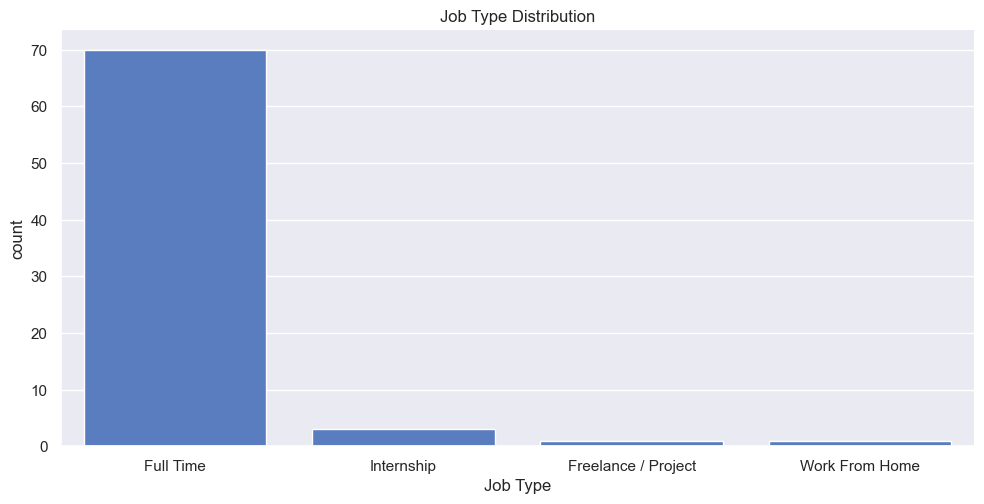

In [28]:
sns.catplot(x="Job Type", kind="count", data=df, height=5, aspect=2,order=df["Job Type"].value_counts().index)
plt.title("Job Type Distribution")
plt.show()

### __Experience Level__

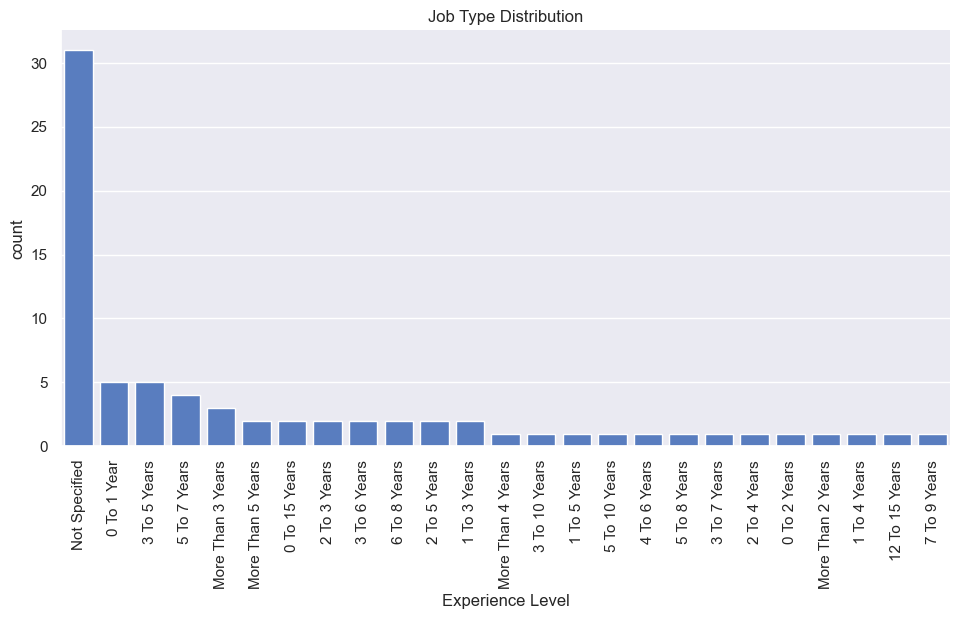

In [29]:
sns.catplot(x="Experience Level", kind="count", data=df, height=5, aspect=2,order=df["Experience Level"].value_counts().index)
plt.title("Job Type Distribution")
plt.xticks(rotation=90)
plt.show()

## __City__ 

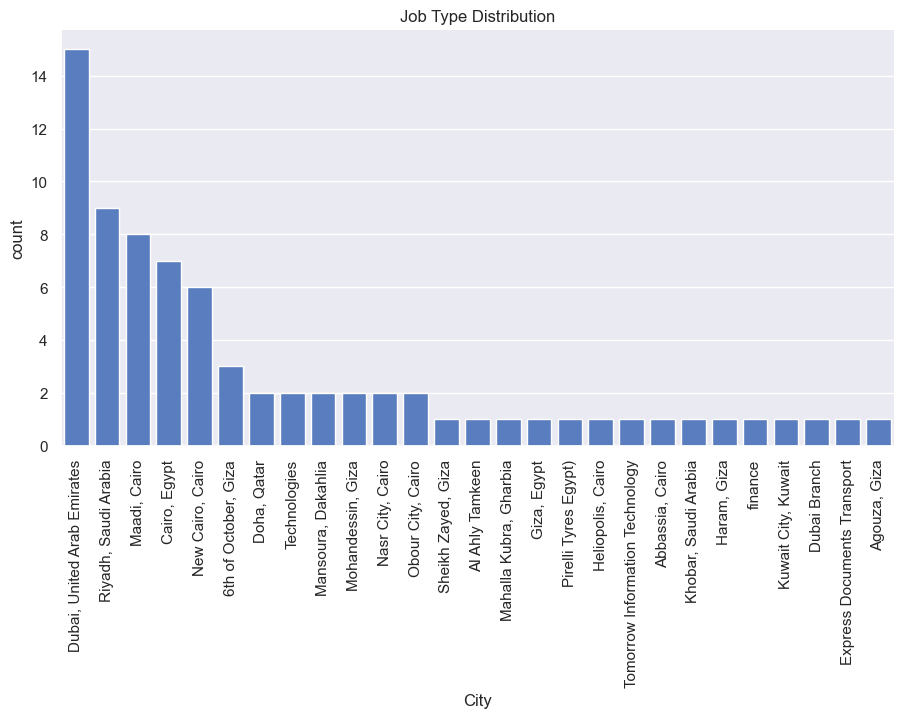

In [30]:
sns.catplot(x="City", kind="count", data=df, height=5, aspect=2,order=df["City"].value_counts().index)
plt.title("Job Type Distribution")

plt.xticks(rotation=90)
plt.show()

## __Save the data frame in excel file__ 

In [31]:
df.to_excel("wuzzef_data.xlsx", index=False) # save the dataframe to excel file 